# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-11-206-MIA-rep1_CRR_DiadFit,103.097247,0.030432,1286.159721,0.026745,77.963404,1286.159721,90.970689,0.517250,3.229164,...,1.149100,0.054447,0.013269,1.072414,1.054496,0.064916,0.006932,PseudoVoigtModel,PseudoVoigtModel,No
1,186-11-206-MIA-rep2,103.123792,0.016951,1286.076085,0.014637,115.349869,1286.076085,134.590849,0.519184,2.509988,...,1.119593,0.102077,0.009002,1.220588,1.235127,0.204564,0.004892,PseudoVoigtModel,PseudoVoigtModel,No
2,186-11-206-MIA-rep3,103.089939,0.020101,1286.065617,0.017779,98.439938,1286.065617,128.372743,0.505189,2.202030,...,1.148718,0.120115,0.010264,1.171004,1.187500,0.160815,0.005637,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-206-MIB-rep1,102.993374,0.033189,1286.332869,0.031936,112.366139,1286.332869,117.523052,0.360601,2.416540,...,1.360947,0.218546,0.006418,1.096886,1.105263,0.084824,0.006107,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-206-MIB-rep2,102.960761,0.064063,1286.353166,0.060819,107.079839,1286.353166,97.407700,0.308126,2.164822,...,1.337349,0.181806,0.005755,1.085714,1.095101,0.109714,0.013400,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','broad','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'003 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 98/98 [00:14<00:00,  6.65it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 30, 2024\n",August,30.0,6.041,45.0,5.0,50.0,"['0h', '3m', '46s']",1:31:01 PM\n,48661.0,1324.964
1,186-11-206-MIA-rep1.txt,"August 30, 2024\n",August,30.0,12.028,60.0,4.0,50.0,"['0h', '4m', '2s']",1:53:08 PM\n,49988.0,1324.964
2,186-11-206-MIA-rep2.txt,"August 30, 2024\n",August,30.0,12.030,60.0,4.0,50.0,"['0h', '4m', '1s']",1:58:49 PM\n,50329.0,1324.964
3,186-11-206-MIA-rep3.txt,"August 30, 2024\n",August,30.0,12.024,60.0,4.0,50.0,"['0h', '4m', '1s']",2:03:31 PM\n,50611.0,1324.964
4,186-11-206-MIB-rep1.txt,"August 30, 2024\n",August,30.0,12.014,60.0,4.0,50.0,"['0h', '4m', '1s']",2:11:02 PM\n,51062.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '186-11-206-MIA-rep1', '186-11-206-MIA-rep2',
       '186-11-206-MIA-rep3', '186-11-206-MIB-rep1',
       '186-11-206-MIB-rep2', '186-11-206-MIB-rep3',
       '186-11-207-MIA-rep1', '186-11-207-MIA-rep2',
       '186-11-207-MIA-rep3', '187-9-220-MIB-edgecarb',
       '187-9-220-MIB-rep1', '187-9-220-MIB-rep2', '187-9-220-MIB-rep3',
       '186-11-208-MIA-rep1', '186-11-208-MIA-rep2',
       '186-11-208-MIA-rep3', '186-11-208-MIE-rep1',
       '186-11-208-MIE-rep2', '186-11-208-MIE-rep3', '186-11-209-MIA',
       '186-11-210-MIA-rep1', '186-11-210-MIA-rep2',
       '186-11-210-MIA-rep3', '186-11-211-MIA', '186-11-212-MIA',
       '186-11-212-MIB', '186-11-213-MIA-rep1', '186-11-213-MIA-rep2',
       '186-11-213-MIA-rep3', '186-11-217-MIA', '186-11-218-MIA-rep1',
       '186-11-218-MIA-rep2', '186-11-218-MIA-rep3',
       '186-11-218-MIB-rep1', '186-11-218-MIB-rep2',
       '186-11-218-MIB-rep3', 'FG04-A1-4-end'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-11-206-MIA-rep1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-11-206-MIA-rep1', '186-11-206-MIA-rep2',
       '186-11-206-MIA-rep3', '186-11-206-MIB-rep1',
       '186-11-206-MIB-rep2', '186-11-206-MIB-rep3',
       '186-11-207-MIA-rep1', '186-11-207-MIA-rep2',
       '186-11-207-MIA-rep3', '186-11-208-MIA-rep1',
       '186-11-208-MIA-rep2', '186-11-208-MIA-rep3',
       '186-11-208-MIE-rep1', '186-11-208-MIE-rep2',
       '186-11-208-MIE-rep3', '186-11-209-MIA', '186-11-210-MIA-rep1',
       '186-11-210-MIA-rep2', '186-11-210-MIA-rep3', '186-11-211-MIA',
       '186-11-212-MIA', '186-11-212-MIB', '186-11-213-MIA-rep1',
       '186-11-213-MIA-rep2', '186-11-213-MIA-rep3', '186-11-217-MIA',
       '186-11-218-MIA-rep1', '186-11-218-MIA-rep2',
       '186-11-218-MIA-rep3', '186-11-218-MIB-rep1',
       '186-11-218-MIB-rep2', '186-11-218-MIB-rep3',
       '187-9-220-MIB-edgecarb', '187-9-220-MIB-rep',
       '187-9-220-MIB-rep2', '187-9-220-MIB-rep3', 'FG04-A1-4-start',
       'FG04-A1-4-end'], dtype='<U22')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-11-206-MIA-rep1,103.097247,0.030432,1286.159721,0.026745,77.963404,1286.159721,90.970689,0.517250,3.229164,...,August,30.0,12.028,60.0,4.0,50.0,"['0h', '4m', '2s']",1:53:08 PM\n,49988.0,1324.964
1,186-11-206-MIA-rep2,103.123792,0.016951,1286.076085,0.014637,115.349869,1286.076085,134.590849,0.519184,2.509988,...,August,30.0,12.030,60.0,4.0,50.0,"['0h', '4m', '1s']",1:58:49 PM\n,50329.0,1324.964
2,186-11-206-MIA-rep3,103.089939,0.020101,1286.065617,0.017779,98.439938,1286.065617,128.372743,0.505189,2.202030,...,August,30.0,12.024,60.0,4.0,50.0,"['0h', '4m', '1s']",2:03:31 PM\n,50611.0,1324.964
3,186-11-206-MIB-rep1,102.993374,0.033189,1286.332869,0.031936,112.366139,1286.332869,117.523052,0.360601,2.416540,...,August,30.0,12.014,60.0,4.0,50.0,"['0h', '4m', '1s']",2:11:02 PM\n,51062.0,1324.964
4,186-11-206-MIB-rep2,102.960761,0.064063,1286.353166,0.060819,107.079839,1286.353166,97.407700,0.308126,2.164822,...,August,30.0,12.000,60.0,4.0,50.0,"['0h', '4m', '1s']",2:15:13 PM\n,51313.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.0634108639628678e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-206-MIA-rep1,0.051948,0.012658,0.012064,0.003834,102.881357,0.030446,0.002165,0.030432,12.028,...,49988.0,NaN,NaN,NaN,NaN,NaN,49988.0,0.997906,0.997885,0.997927
1,186-11-206-MIA-rep2,0.062409,0.007761,0.006757,0.003817,102.907757,0.017052,0.002155,0.016951,12.030,...,50329.0,NaN,NaN,NaN,NaN,NaN,50329.0,0.997905,0.997884,0.997926
2,186-11-206-MIA-rep3,0.048994,0.008868,0.007993,0.003839,102.873902,0.020173,0.002145,0.020101,12.024,...,50611.0,NaN,NaN,NaN,NaN,NaN,50611.0,0.997904,0.997884,0.997925
3,186-11-206-MIB-rep1,0.010764,0.013731,0.013150,0.003950,102.777421,0.033188,0.002129,0.033189,12.014,...,51062.0,NaN,NaN,NaN,NaN,NaN,51062.0,0.997903,0.997883,0.997924
4,186-11-206-MIB-rep2,0.000000,0.000000,0.000000,0.000000,102.744811,0.063964,0.002122,0.064063,12.000,...,51313.0,NaN,NaN,NaN,NaN,NaN,51313.0,0.997903,0.997882,0.997923


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.0634108639628678e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-206-MIA-rep1,0.051948,0.012658,0.012064,0.003834,102.881357,0.030446,0.002165,0.030432,12.028,...,49988.0,NaN,NaN,NaN,NaN,NaN,49988.0,0.997906,0.997885,0.997927
1,186-11-206-MIA-rep2,0.062409,0.007761,0.006757,0.003817,102.907757,0.017052,0.002155,0.016951,12.030,...,50329.0,NaN,NaN,NaN,NaN,NaN,50329.0,0.997905,0.997884,0.997926
2,186-11-206-MIA-rep3,0.048994,0.008868,0.007993,0.003839,102.873902,0.020173,0.002145,0.020101,12.024,...,50611.0,NaN,NaN,NaN,NaN,NaN,50611.0,0.997904,0.997884,0.997925
3,186-11-206-MIB-rep1,0.010764,0.013731,0.013150,0.003950,102.777421,0.033188,0.002129,0.033189,12.014,...,51062.0,NaN,NaN,NaN,NaN,NaN,51062.0,0.997903,0.997883,0.997924
4,186-11-206-MIB-rep2,0.000000,0.000000,0.000000,0.000000,102.744811,0.063964,0.002122,0.064063,12.000,...,51313.0,NaN,NaN,NaN,NaN,NaN,51313.0,0.997903,0.997882,0.997923


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 30, 2024_fitted_2024-09-19.xlsx


## This helps visualize the errors on each spectra 

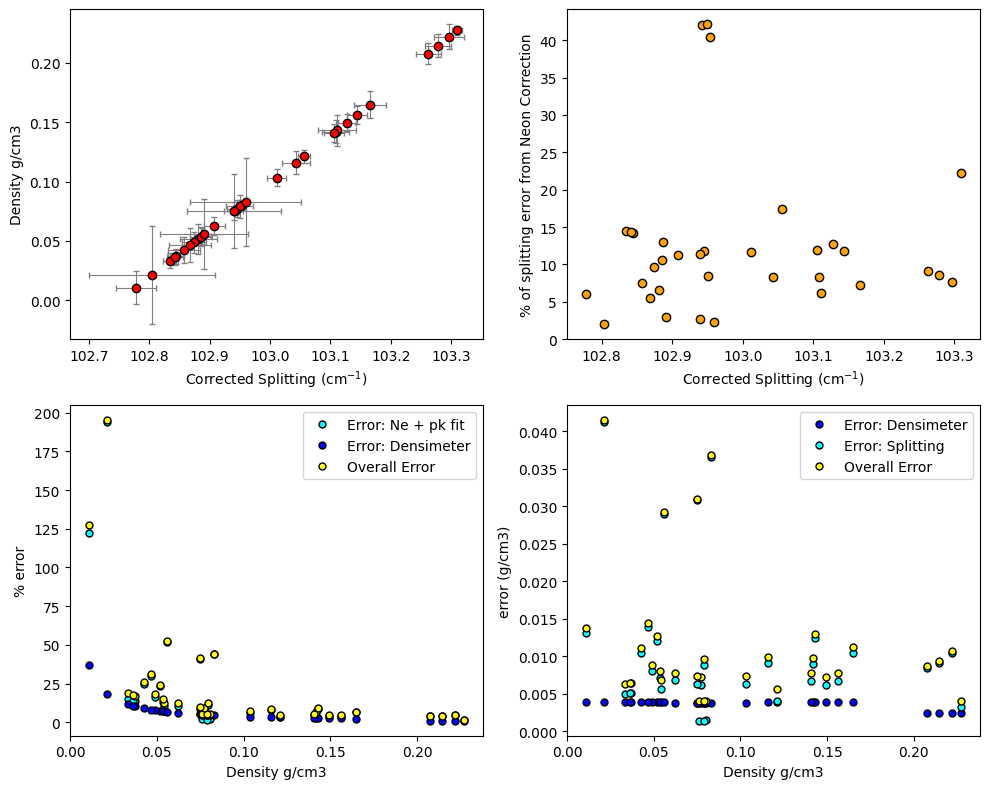

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [17]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-206-MIA-rep1,0.051948,0.012658,0.012064,0.003834,102.881357,0.030446,0.002165,0.030432,12.028,...,49988.0,NaN,NaN,NaN,NaN,NaN,49988.0,0.997906,0.997885,0.997927
1,186-11-206-MIA-rep2,0.062409,0.007761,0.006757,0.003817,102.907757,0.017052,0.002155,0.016951,12.030,...,50329.0,NaN,NaN,NaN,NaN,NaN,50329.0,0.997905,0.997884,0.997926
2,186-11-206-MIA-rep3,0.048994,0.008868,0.007993,0.003839,102.873902,0.020173,0.002145,0.020101,12.024,...,50611.0,NaN,NaN,NaN,NaN,NaN,50611.0,0.997904,0.997884,0.997925
3,186-11-206-MIB-rep1,0.010764,0.013731,0.013150,0.003950,102.777421,0.033188,0.002129,0.033189,12.014,...,51062.0,NaN,NaN,NaN,NaN,NaN,51062.0,0.997903,0.997883,0.997924
5,186-11-206-MIB-rep3,0.021263,0.041477,0.041292,0.003913,102.803918,0.104209,0.002116,0.104407,11.991,...,51586.0,NaN,NaN,NaN,NaN,NaN,51586.0,0.997902,0.997881,0.997922
6,186-11-207-MIA-rep1,0.033427,0.006323,0.004996,0.003876,102.834616,0.012608,0.002105,0.012457,12.014,...,52041.0,NaN,NaN,NaN,NaN,NaN,52041.0,0.997901,0.997880,0.997921
7,186-11-207-MIA-rep2,0.054372,0.006782,0.005597,0.003829,102.887476,0.014125,0.002098,0.013998,12.014,...,52406.0,NaN,NaN,NaN,NaN,NaN,52406.0,0.997900,0.997879,0.997920
8,186-11-207-MIA-rep3,0.037146,0.006368,0.005060,0.003866,102.844002,0.012769,0.002091,0.012624,12.013,...,52702.0,NaN,NaN,NaN,NaN,NaN,52702.0,0.997899,0.997879,0.997919
32,187-9-220-MIB-edgecarb,0.076298,0.004055,0.001403,0.003804,102.942811,0.003542,0.002082,0.002871,10.034,...,53317.0,1095.363607,1408.479111,93.352216,Spline,0.711703,53317.0,0.997898,0.997877,0.997918
33,187-9-220-MIB-rep2,0.080406,0.004074,0.001464,0.003802,102.953177,0.003694,0.002074,0.003063,10.025,...,53833.0,NaN,NaN,NaN,NaN,NaN,53833.0,0.997896,0.997876,0.997916


In [18]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-206-MIA-rep1,0.051948,0.012658,0.012064,0.003834,102.881357,0.030446,0.002165,0.030432,12.028,...,49988.0,NaN,NaN,NaN,NaN,NaN,49988.0,0.997906,0.997885,0.997927
1,186-11-206-MIA-rep2,0.062409,0.007761,0.006757,0.003817,102.907757,0.017052,0.002155,0.016951,12.030,...,50329.0,NaN,NaN,NaN,NaN,NaN,50329.0,0.997905,0.997884,0.997926
2,186-11-206-MIA-rep3,0.048994,0.008868,0.007993,0.003839,102.873902,0.020173,0.002145,0.020101,12.024,...,50611.0,NaN,NaN,NaN,NaN,NaN,50611.0,0.997904,0.997884,0.997925
3,186-11-206-MIB-rep1,0.010764,0.013731,0.013150,0.003950,102.777421,0.033188,0.002129,0.033189,12.014,...,51062.0,NaN,NaN,NaN,NaN,NaN,51062.0,0.997903,0.997883,0.997924
5,186-11-206-MIB-rep3,0.021263,0.041477,0.041292,0.003913,102.803918,0.104209,0.002116,0.104407,11.991,...,51586.0,NaN,NaN,NaN,NaN,NaN,51586.0,0.997902,0.997881,0.997922
6,186-11-207-MIA-rep1,0.033427,0.006323,0.004996,0.003876,102.834616,0.012608,0.002105,0.012457,12.014,...,52041.0,NaN,NaN,NaN,NaN,NaN,52041.0,0.997901,0.997880,0.997921
7,186-11-207-MIA-rep2,0.054372,0.006782,0.005597,0.003829,102.887476,0.014125,0.002098,0.013998,12.014,...,52406.0,NaN,NaN,NaN,NaN,NaN,52406.0,0.997900,0.997879,0.997920
8,186-11-207-MIA-rep3,0.037146,0.006368,0.005060,0.003866,102.844002,0.012769,0.002091,0.012624,12.013,...,52702.0,NaN,NaN,NaN,NaN,NaN,52702.0,0.997899,0.997879,0.997919
32,187-9-220-MIB-edgecarb,0.076298,0.004055,0.001403,0.003804,102.942811,0.003542,0.002082,0.002871,10.034,...,53317.0,1095.363607,1408.479111,93.352216,Spline,0.711703,53317.0,0.997898,0.997877,0.997918
33,187-9-220-MIB-rep2,0.080406,0.004074,0.001464,0.003802,102.953177,0.003694,0.002074,0.003063,10.025,...,53833.0,NaN,NaN,NaN,NaN,NaN,53833.0,0.997896,0.997876,0.997916


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

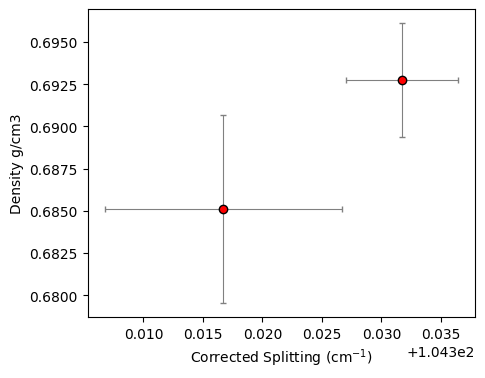

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [20]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

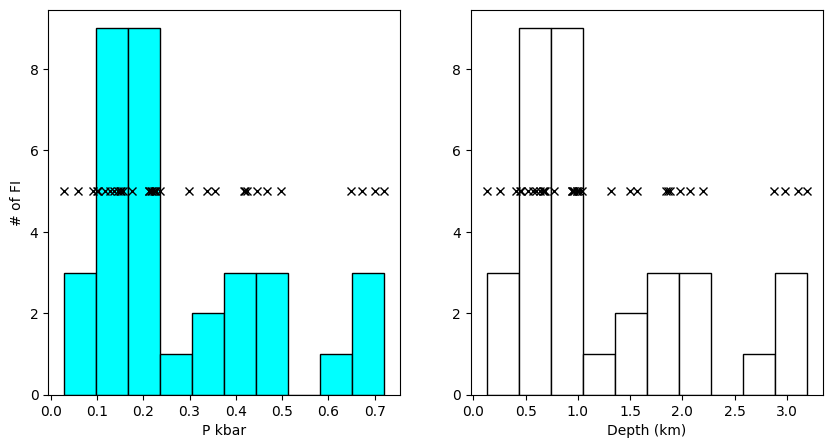

In [21]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')